In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from prettytable import PrettyTable

In [2]:
# Import data set and explore data
car_data = pd.read_csv('Data/carvana.csv')

car_data

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [4]:
car_data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [5]:
car_data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

There are no null values in our data set.

In [6]:
car_data.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

There are 416 unique make and model combinations in our data set.

In [7]:
# Present list of all the makes and models
car_data['Name'].unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

The make and models appear to be input cleanly.

In [8]:
car_data['Year'].unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

We can see several year inputs have extra digits. It seems the first 4 digits are entered correctly so we will need to clean the 'Year' column.

In [9]:
# convert year column to str so we can pull first 4 digits
clean_y = car_data['Year'].astype('str')

clean_y                   

0         2018
1         2020
2         2012
3         2019
4        20173
         ...  
21995     2014
21996     2016
21997     2013
21998     2020
21999     2012
Name: Year, Length: 22000, dtype: object

In [10]:
# Create empyty list for Year and enter first 4 digits of year column for each entry
Year = []
for y in clean_y:
    Year.append(y[:4])

In [11]:
# remove original Year column
car_data.drop(['Year'], inplace=True, axis=1)

In [12]:
# add in clean year column
car_data.insert(loc=1, column='Year', value=Year)

In [13]:
car_data['Year'].unique()

array(['2018', '2020', '2012', '2019', '2017', '2016', '2015', '2014',
       '2010', '2013', '2011', '2021', '2022', '2009', '2023'],
      dtype=object)

Year column is now clean.

In [14]:
# convert year column back to int
car_data['Year'] = car_data['Year'].apply(pd.to_numeric)

In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [16]:
# any extreme values in miles?
print(car_data['Miles'].sort_values().head())
print(car_data['Miles'].sort_values().tail())

4415     53
4473     53
5496     81
6209    230
4822    347
Name: Miles, dtype: int64
660     113710
799     113710
472     116121
406     116121
2540    120167
Name: Miles, dtype: int64


The 'Miles' data appears to be reasonable as there are no negative values or unrealisitc positive values

In [17]:
# any extreme values in price?
print(car_data['Price'].sort_values().head())
print(car_data['Price'].sort_values().tail())

11143    10990
6401     11590
6402     11590
1795     11990
3406     11990
Name: Price, dtype: int64
5644     89990
6091     92990
5986     94590
3800     98590
5367    102990
Name: Price, dtype: int64


The 'Price' data appears to be reasonable.

In [18]:
# add age column
car_data['Age'] = 2023 - car_data['Year']

In [19]:
car_data

,Name,Year,Miles,Price,Age
0,Chevrolet Trax,2018,41946,16990,5
1,GMC Terrain,2020,45328,23990,3
2,Jeep Wrangler,2012,81068,21590,11
3,Jeep Renegade,2019,35372,21590,4
4,BMW X,2017,68992,22990,6
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,9
21996,Dodge Charger,2016,62616,23990,7
21997,Ford Taurus,2013,50345,16990,10
21998,Toyota Corolla Hatchback,2020,27945,23990,3


# Visualizations

Text(0, 0.5, 'Count')

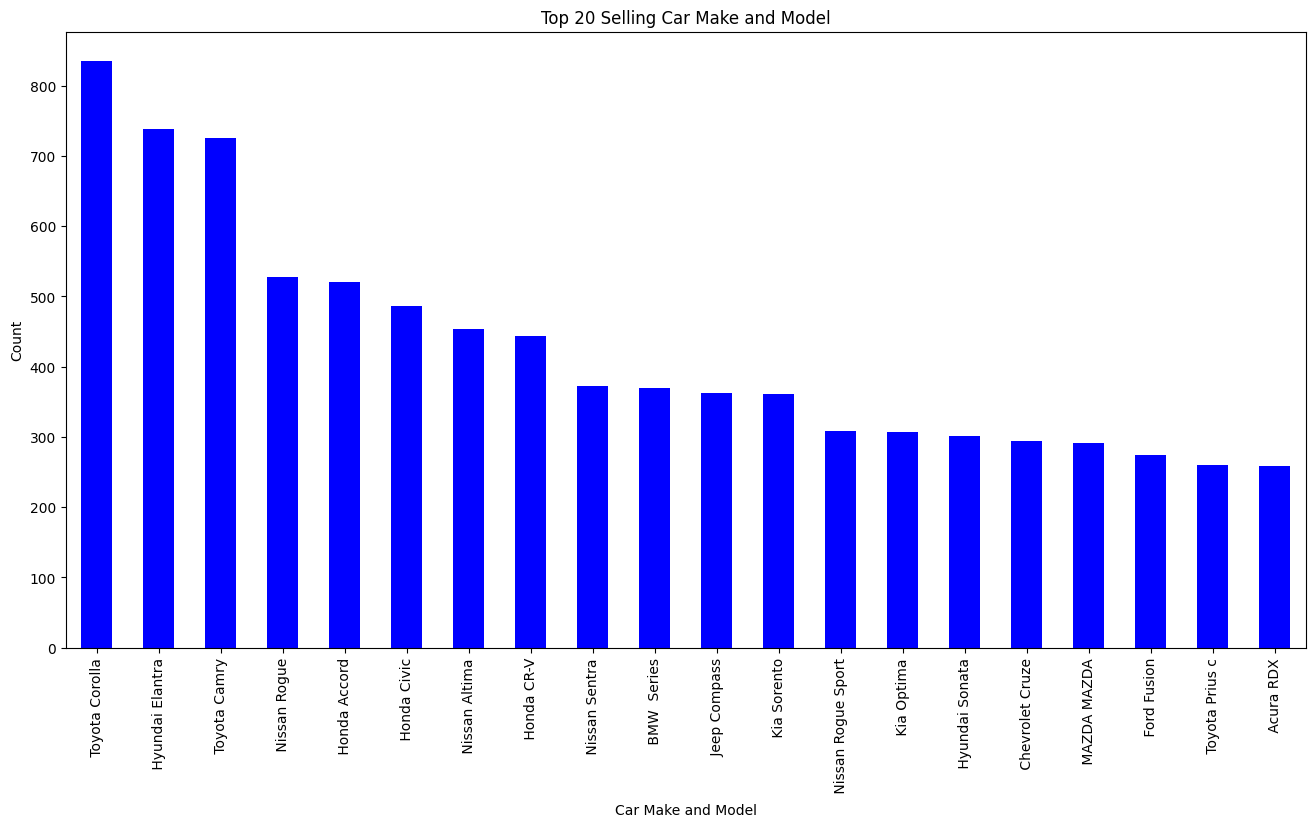

In [20]:
# What are the top 20 selling car make and models?
plt.figure(figsize=(16, 8))

car_data['Name'].value_counts().head(20).plot(kind='bar', color='blue')
plt.title('Top 20 Selling Car Make and Model')
plt.xlabel('Car Make and Model')
plt.ylabel('Count')

In [21]:
# most sold make and model
car_max = car_data['Name'].value_counts().idxmax()
num_car_max = car_data['Name'].value_counts().max()

# least sold make and model
car_min = car_data['Name'].value_counts().idxmin()
num_car_min = car_data['Name'].value_counts().min()

print("The", car_max, "is the most sold car in the data set with", num_car_max, "cars sold. The", car_min, "is the least sold car with only", num_car_min, "car sold.")

The  Toyota Corolla is the most sold car in the data set with 835 cars sold. The  Volkswagen New Beetle is the least sold car with only 1 car sold.


Text(0, 0.5, 'Count')

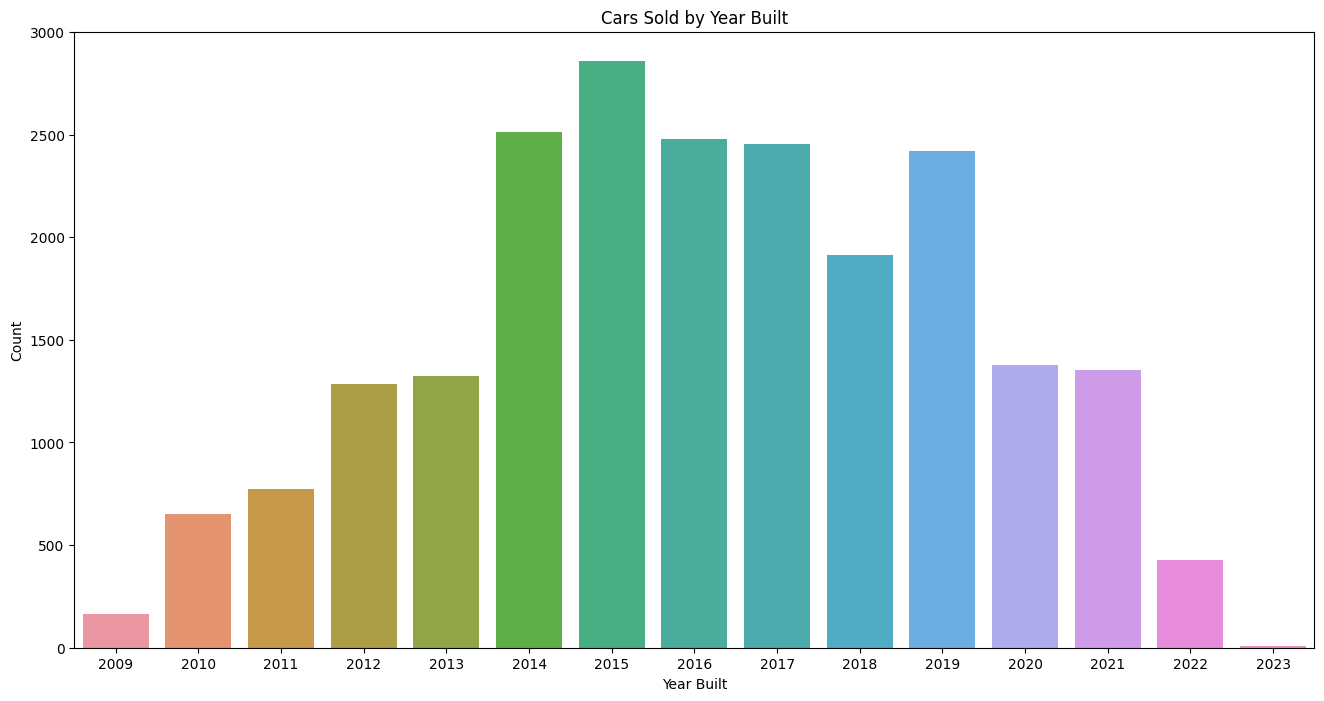

In [22]:
# Show the number of cars sold by year built
plt.figure(figsize=(16, 8))

sns.countplot(x='Year', data=car_data)
plt.title('Cars Sold by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

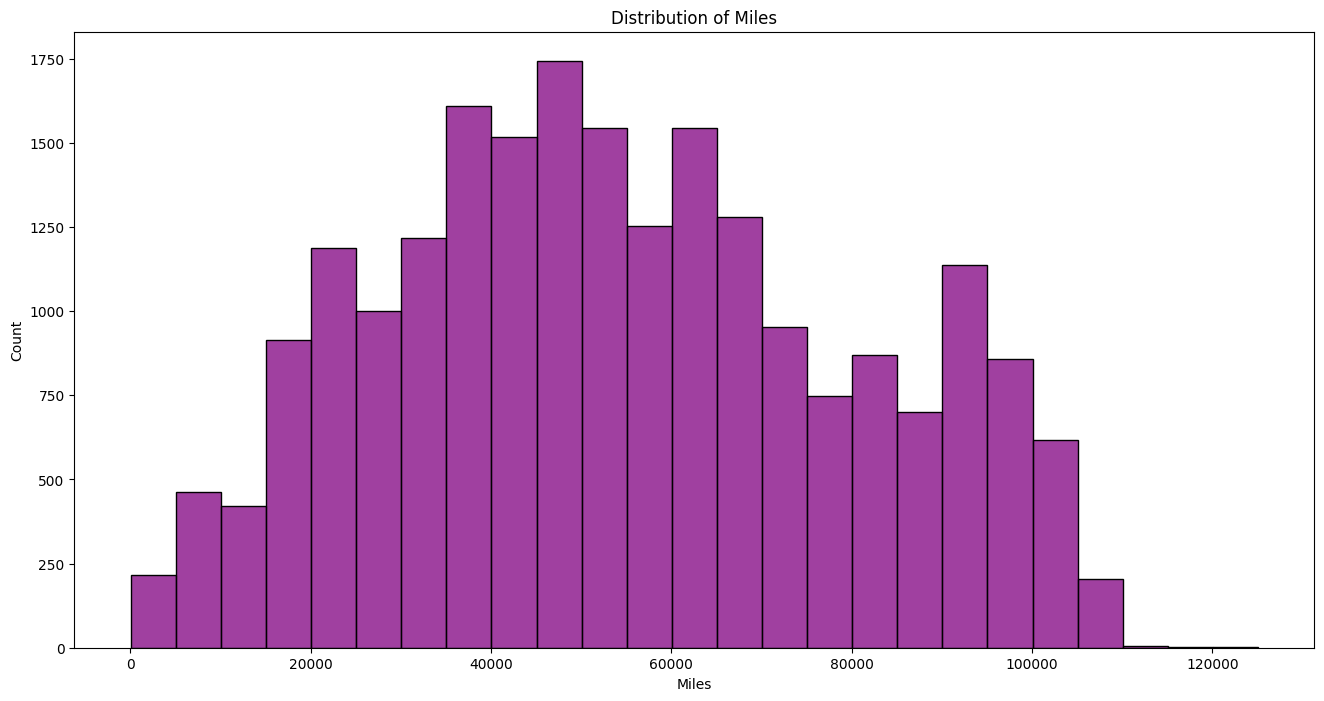

In [23]:
# What is the distribution of car miles?
plt.figure(figsize=(16, 8))

sns.histplot(x='Miles', data=car_data, binwidth=5000, color='purple')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Count')

The mileage distribution shows us the majority of cars sold have between 35,000 and 70,000 miles. The distribution also appears to be normal.

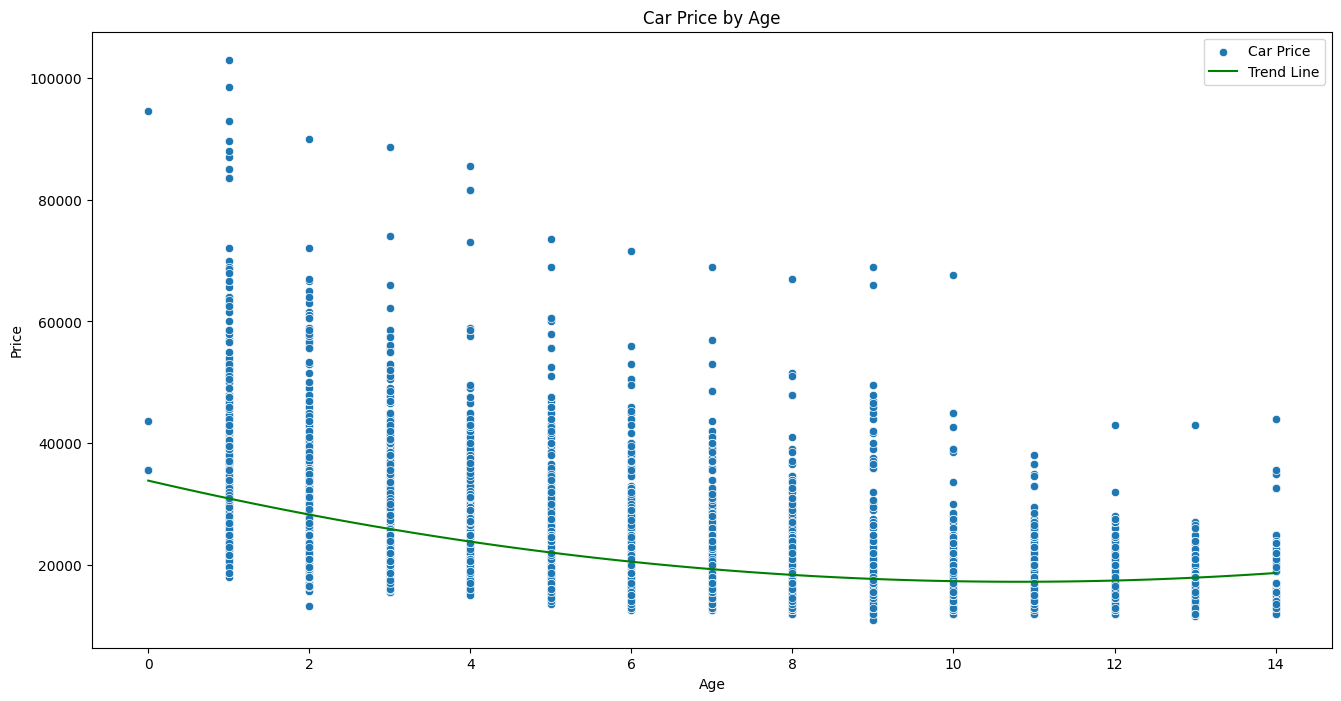

In [24]:
# Show relationship between 'Age' and 'Price' with Trend Line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=car_data, x='Age', y='Price')
plt.title('Car Price by Age')
plt.xlabel('Age')
plt.ylabel('Price')

# Trend line
x = car_data['Age']
y = car_data['Price']
a, b, c = np.polyfit(x, y, deg=2)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='green', label='Trend Line')

plt.legend(['Car Price', 'Trend Line'])

The scatter plot with trend line above shows us that as age increases, the price declines.

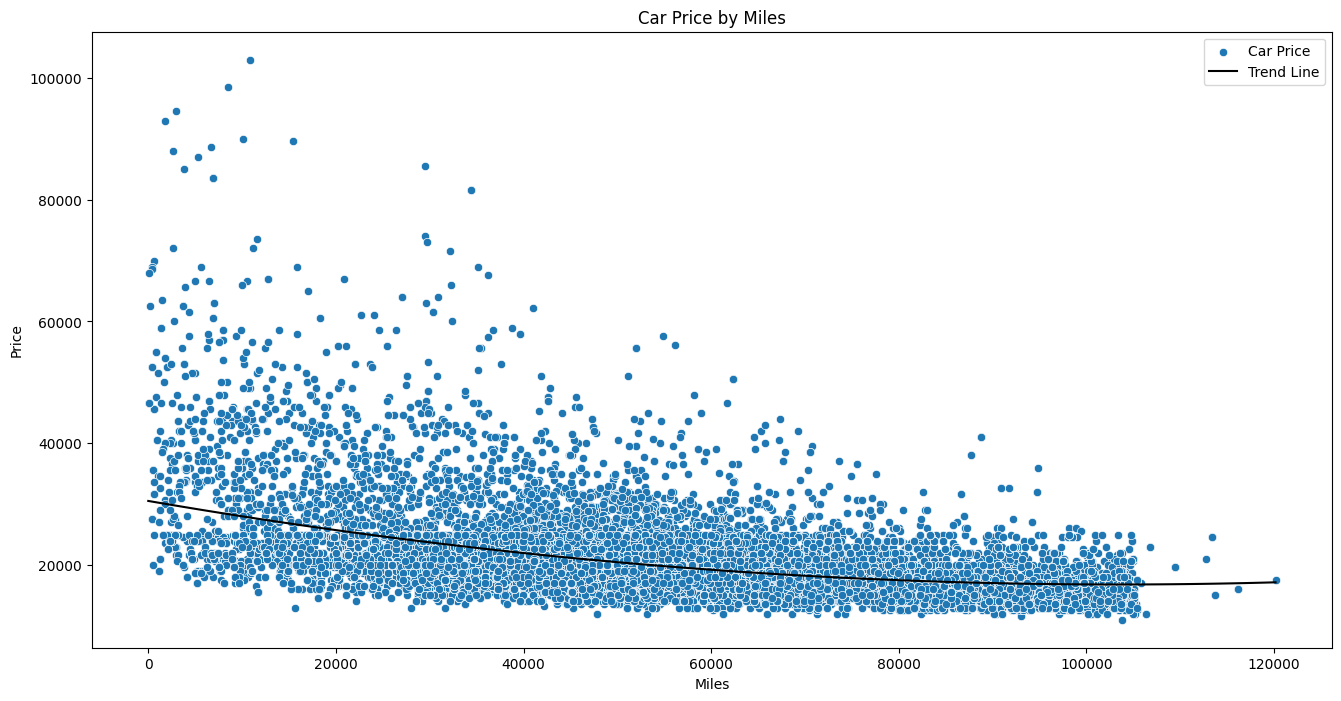

In [25]:
# Show relationship between 'Miles' and 'Price' with Trend Line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=car_data, x='Miles', y='Price')
plt.title('Car Price by Miles')
plt.xlabel('Miles')
plt.ylabel('Price')

# Trend line
x = car_data['Miles']
y = car_data['Price']
a, b, c = np.polyfit(x, y, deg=2)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='black', label='Trend Line')

plt.legend(['Car Price', 'Trend Line'])

Similar to age, as miles increase, the car price decreases.

# Predictive Model

Can we build a model that will predict the car price when given the car make, model, year built and mileage?

In [26]:
# create new dataframe that removes 'Age' since it is redundant with 'Year'
car_data_pred = car_data.copy()
car_data_pred = car_data_pred.drop('Age', axis=1)
car_data_pred2 = car_data_pred.copy()

car_data_pred

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,2017,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


The challenge with this data set is dealing with the high cardinality in the 'Name' column as there are 416 unique make and models. The best way to approach a field with high cardinality is to see if we can better group the categories. We'll start by splitting the 'Name' column into 'Make' and 'Model' columns.

In [27]:
# split 'Name' column into a list to isolate 'Make' and 'Model'
car_data_pred[['Space', 'Make', 'Model']] = car_data_pred['Name'].str.split(' ', n=2, expand=True)
car_data_pred

,Name,Year,Miles,Price,Space,Make,Model
0,Chevrolet Trax,2018,41946,16990,,Chevrolet,Trax
1,GMC Terrain,2020,45328,23990,,GMC,Terrain
2,Jeep Wrangler,2012,81068,21590,,Jeep,Wrangler
3,Jeep Renegade,2019,35372,21590,,Jeep,Renegade
4,BMW X,2017,68992,22990,,BMW,X
...,...,...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,,Honda,Accord
21996,Dodge Charger,2016,62616,23990,,Dodge,Charger
21997,Ford Taurus,2013,50345,16990,,Ford,Taurus
21998,Toyota Corolla Hatchback,2020,27945,23990,,Toyota,Corolla Hatchback


In [28]:
# Let's see how many unique car 'Make' we have to see if we can group by car 'Make'
car_make = pd.DataFrame(car_data_pred['Make'].unique())
car_make.columns=['Make']
car_make

,Make
0,Chevrolet
1,GMC
2,Jeep
3,BMW
4,Buick
5,Chrysler
6,Subaru
7,Mitsubishi
8,Toyota
9,Nissan


There are 41 unique car 'Make'. This is still too many categories for our analysis. To build our model, we will categorize the cars based on the class of the vehicle's 'Make'. We will breakdown the 'Car_Brand_Class' as either 'Luxury' or 'Economy'

In [29]:
# sort car 'Make' so we can create a list of the 'Luxury' car brands
car_make = car_make.sort_values('Make')
car_make

,Make
20,Acura
24,Alfa
23,Audi
3,BMW
4,Buick
26,Cadillac
0,Chevrolet
5,Chrysler
12,Dodge
17,FIAT


In [30]:
# create list of 'Luxury' car brands
luxury = ['Acura', 'Alfa', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'INFINITI', 'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes-Benz', 'Porsche', 'Tesla', 'Volvo'] 

In [31]:
# add column to dataframe that identifies if the 'Car_Brand_Class' is 'Luxury' or 'Economy'
car_data_pred['Car_Brand_Class'] = car_data_pred['Make'].apply(lambda x: 'Luxury' if x in luxury else 'Economy')
car_data_pred.head()

,Name,Year,Miles,Price,Space,Make,Model,Car_Brand_Class
0,Chevrolet Trax,2018,41946,16990,,Chevrolet,Trax,Economy
1,GMC Terrain,2020,45328,23990,,GMC,Terrain,Economy
2,Jeep Wrangler,2012,81068,21590,,Jeep,Wrangler,Economy
3,Jeep Renegade,2019,35372,21590,,Jeep,Renegade,Economy
4,BMW X,2017,68992,22990,,BMW,X,Luxury


In [32]:
# since we will only use the 'Car_Brand_Class' for our model, we can remove the 'Name', 'Space', 'Make' and 'Model' columns
car_data_pred = car_data_pred.drop(columns=['Name', 'Space', 'Make', 'Model'])
car_data_pred.head()

,Year,Miles,Price,Car_Brand_Class
0,2018,41946,16990,Economy
1,2020,45328,23990,Economy
2,2012,81068,21590,Economy
3,2019,35372,21590,Economy
4,2017,68992,22990,Luxury


array([[<AxesSubplot: title={'center': 'Year'}>,
        <AxesSubplot: title={'center': 'Miles'}>],
       [<AxesSubplot: title={'center': 'Price'}>, <AxesSubplot: >]],
      dtype=object)

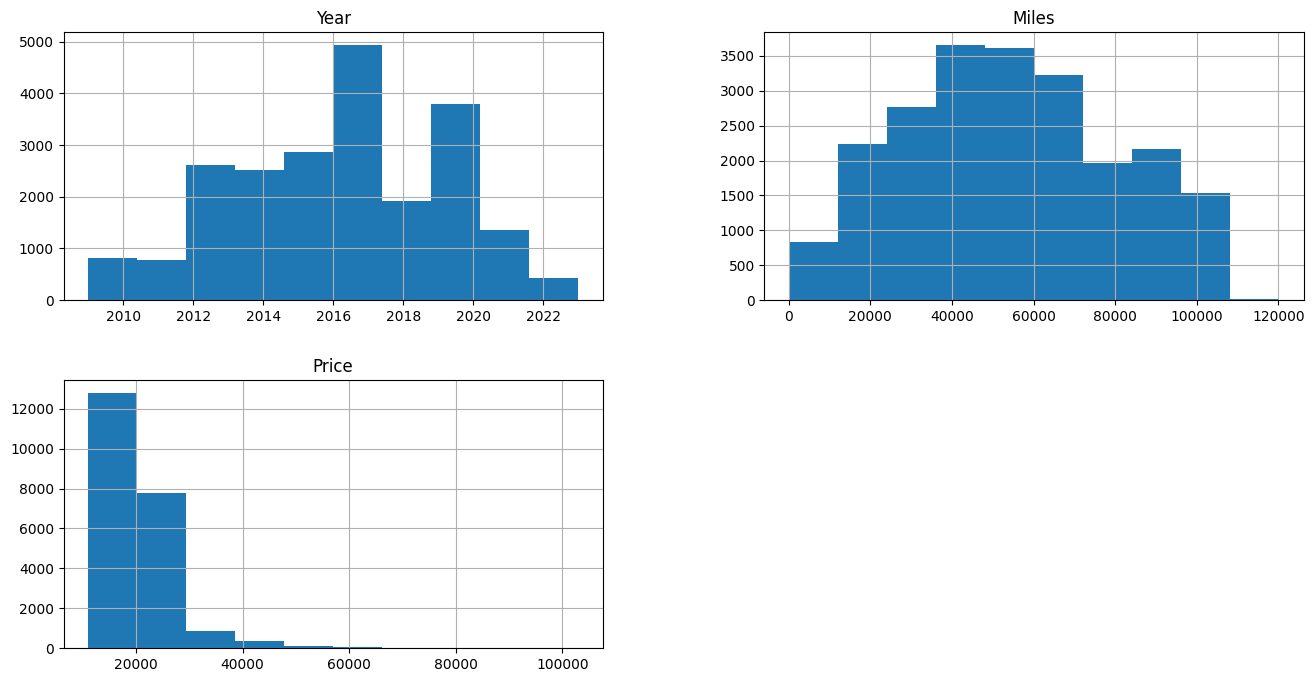

In [33]:
car_data_pred.hist(figsize=(16, 8))

The 'Year' and 'Miles' data have relatively normal distributions. 

In [34]:
# convert 'Car_Brand_Class' categories into numerical values for the model
car_data_pred = car_data_pred.join(pd.get_dummies(car_data_pred.Car_Brand_Class)).drop(['Car_Brand_Class'], axis=1)
car_data_pred

,Year,Miles,Price,Economy,Luxury
0,2018,41946,16990,1,0
1,2020,45328,23990,1,0
2,2012,81068,21590,1,0
3,2019,35372,21590,1,0
4,2017,68992,22990,0,1
...,...,...,...,...,...
21995,2014,98085,17590,1,0
21996,2016,62616,23990,1,0
21997,2013,50345,16990,1,0
21998,2020,27945,23990,1,0


Now our car_data_pred dataframe is ready for the model.

<AxesSubplot: >

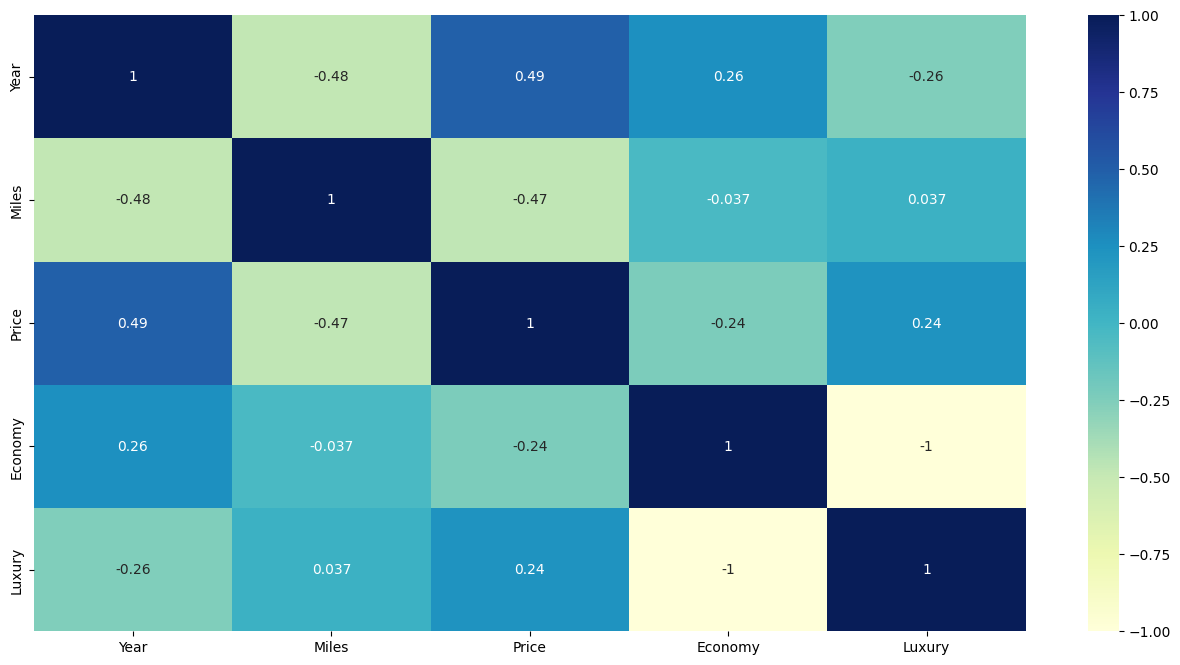

In [35]:
# Create heatmap of the correlation between the variables
plt.figure(figsize=(16, 8))
sns.heatmap(car_data_pred.corr(), annot=True, cmap='YlGnBu')

The correlation heatmap above shows 'Miles' has a moderate negative correlation to 'Price', while 'Year' has a moderate positive correlation to 'Price'. This means as mileage increases prices decreases, and the newer the car the higher the price. The economy class has a small negative correlation to 'Price', while the luxury class has a small positive correlation to 'Price'.

In [36]:
# assign columns we will use to predict price to X and 'Price' to y
X = car_data_pred.drop(['Price'], axis=1)
y = car_data_pred['Price']

In [37]:
# make sure shape of X and Y are compatible
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

Shape of X is: (22000, 4)
Shape of y is: (22000,)


In [38]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# make sure split data is compatible
print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (17600, 4)
Shape of y_train is: (17600,)
Shape of X_test is: (4400, 4)
Shape of y_test is: (4400,)


In [40]:
# tested applying scaler to data but lowered r2_score so removed
#scaler = StandardScaler()

In [41]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

### Linear Regression Model

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [43]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of the linear regression model is:", linreg_mae)
print("R2 of the linear regression model is:", linreg_r2)

MAE of the linear regression model is: 3128.653103446091
R2 of the linear regression model is: 0.43073409398505136


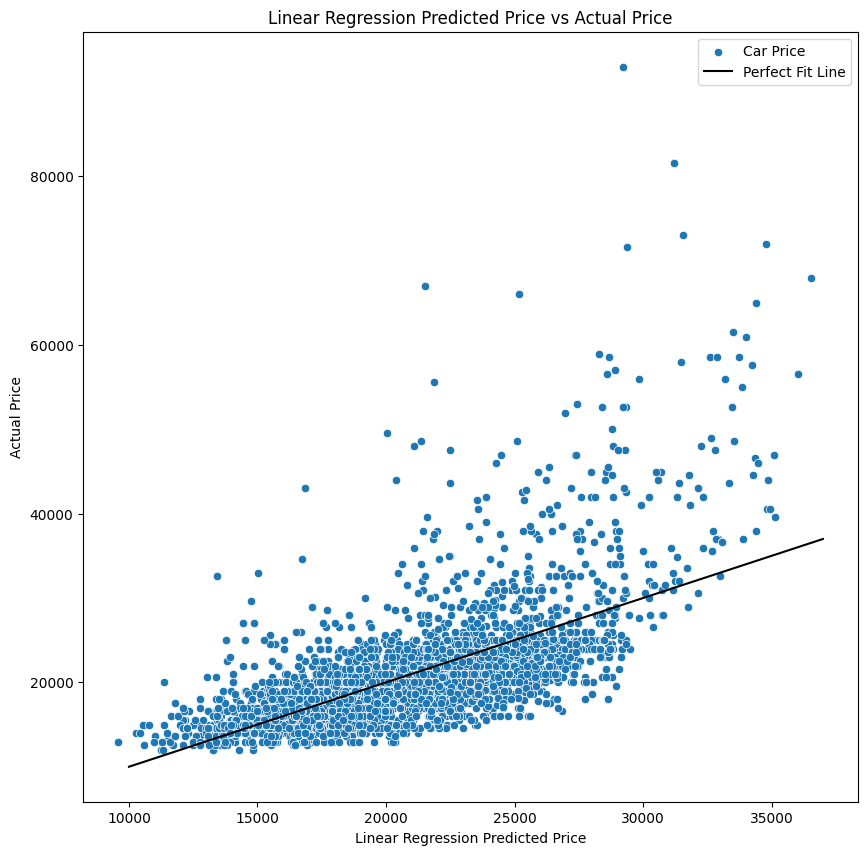

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=linreg_pred, y=y_test)
x = np.linspace(10000, 37000, num=100)
plt.plot(x, x, color='black')
plt.title('Linear Regression Predicted Price vs Actual Price')
plt.xlabel('Linear Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

### Random Forest Regression Model

In [45]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [46]:
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
print("MAE of the random forest regression model is:", forest_mae)
print("R2 of the random forest regression model is:", forest_r2)

MAE of the random forest regression model is: 1657.3707588575535
R2 of the random forest regression model is: 0.6754576394950009


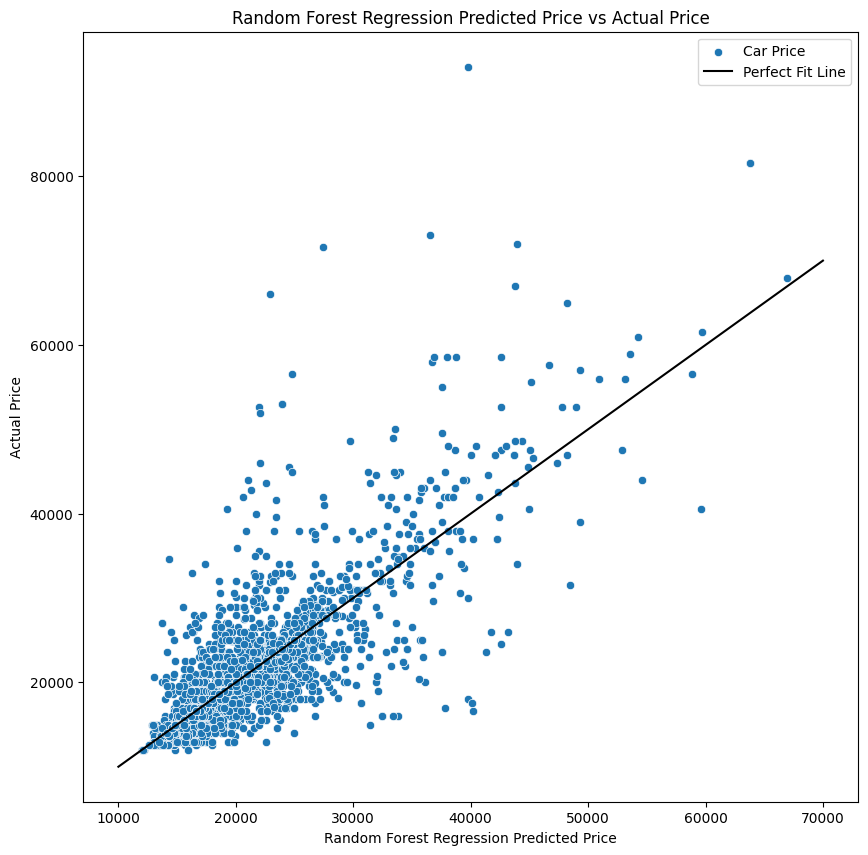

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=forest_pred, y=y_test)
x = np.linspace(10000, 70000, num=100)
plt.plot(x, x, color='black')
plt.title('Random Forest Regression Predicted Price vs Actual Price')
plt.xlabel('Random Forest Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

### XGBoost Regression Model

In [48]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [49]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of the random forest regression model is:", xgb_mae)
print("R2 of the random forest regression model is:", xgb_r2)

MAE of the random forest regression model is: 2247.9765385298297
R2 of the random forest regression model is: 0.6376162799139116


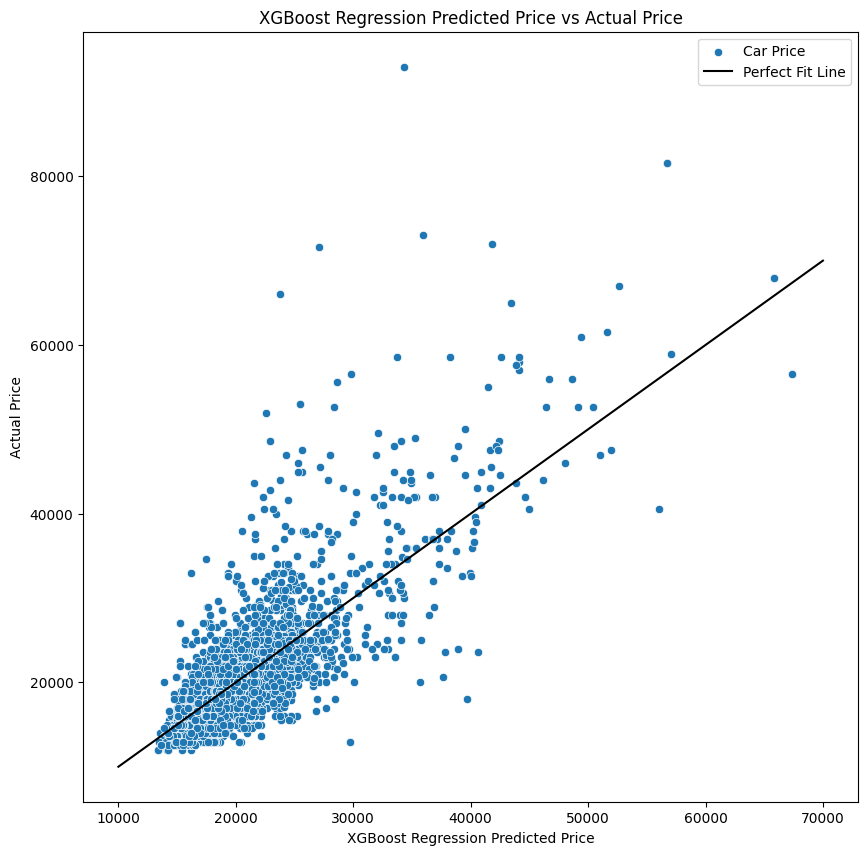

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=xgb_pred, y=y_test)
x = np.linspace(10000, 70000, num=100)
plt.plot(x, x, color='black')
plt.title('XGBoost Regression Predicted Price vs Actual Price')
plt.xlabel('XGBoost Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

### Summary of Regression Models

In [51]:
table = PrettyTable([" ", "Linear Regression", "Random Forest", "XGBoost"])
table.add_row(["MAE", linreg_mae.round(), forest_mae.round(), xgb_mae.round()])
table.add_row(["R2 Score", linreg_r2.round(decimals=5), forest_r2.round(decimals=5), xgb_r2.round(decimals=5)])

print(table)

+----------+-------------------+---------------+---------+
|          | Linear Regression | Random Forest | XGBoost |
+----------+-------------------+---------------+---------+
|   MAE    |       3129.0      |     1657.0    |  2248.0 |
| R2 Score |      0.43073      |    0.67546    | 0.63762 |
+----------+-------------------+---------------+---------+


The table above shows us that the random forest regression model performed the best. This is evident as it has the lowest mean absolute error and the highest R2 score. 

### Hypertuning Parameters - Random Forest

In [57]:
# show current parameters
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
# parameters to test
params = [{
    "n_estimators": [225, 250, 275],
    "max_features": [8, 10, 12],
}]  

In [85]:
grid_search = GridSearchCV(forest, params, cv=5, scoring="r2", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10, 12],
                          'n_estimators': [225, 250, 275]}],
             return_train_score=True, scoring='r2')

In [86]:
best_forest = grid_search.best_estimator_

In [87]:
best_forest

RandomForestRegressor(max_features=10, n_estimators=250)

In [88]:
best_forest.score(X_test, y_test)

0.6792255974651666